### DSC 550 Project Milestone 1
More Features, More Value?

The used car market is unpredictable, hostile, and data changes daily. I have partnered with a used car dealership for this project and one of their finance partners. The dealership is struggling to make attractive offers on trade-in vehicles, which cost them viable sales last quarter. The issue with their current model is the absence of owner-led sales data and what features buyers look for in the private sales market. The dealership manager is looking for a custom modeling dashboard that uses owner sale listings versus the national sales data other models provide. 
<p>To explore the problem of predicting the private prices of used cars based on various features such as make, model, year, mileage, and location I have selected a data set from Kaggle of owner listings for used car sales. The target of my model will be to predict the price of a used car accurately based on the given features. The dealership manager has provided customer feedback that points to features being the number one drive of making a purchase. The dataset contains around 300,000 records with 10 features such as make, model, year, price, mileage, fuel type, and location.
<p>In this project we look to answer two overarching questions- one supporting the sales manager’s theory that raising the trade-in offer for cars with more features regardless of mileage, and second the dealership should provide an incentive for hard-to-find vehicles. 


### Here's a first look at the data.

In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

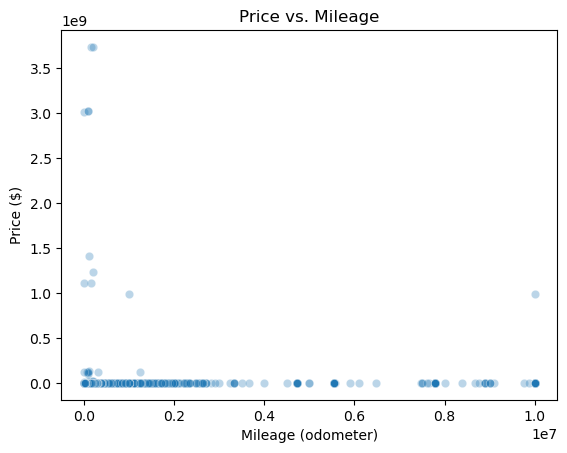

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv('vehicles.csv')

# Scatter plot of price vs. mileage
sns.scatterplot(data=df, x='odometer', y='price', alpha=0.3)
plt.xlabel('Mileage (odometer)')
plt.ylabel('Price ($)')
plt.title('Price vs. Mileage')
plt.show()

The scatter plot reveals that there is a negative correlation between the price of a car and its mileage, which is expected. As the mileage of the car increases, the price decreases.

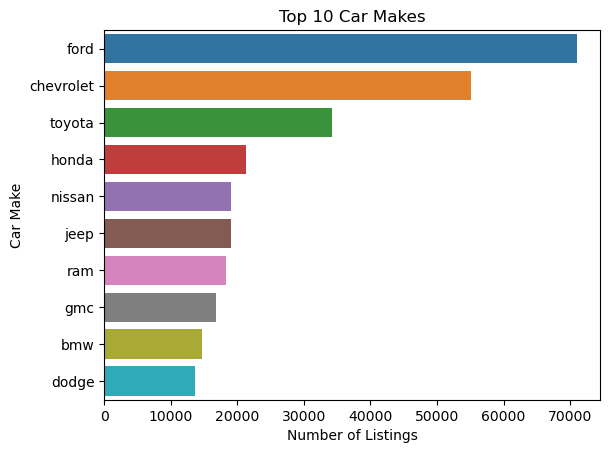

In [3]:
top_makes = df['manufacturer'].value_counts().head(10)
sns.barplot(x=top_makes.values, y=top_makes.index)
plt.xlabel('Number of Listings')
plt.ylabel('Car Make')
plt.title('Top 10 Car Makes')
plt.show()

The bar chart shows that the top three car makes in the dataset are Ford, Chevrolet, and Toyota. 

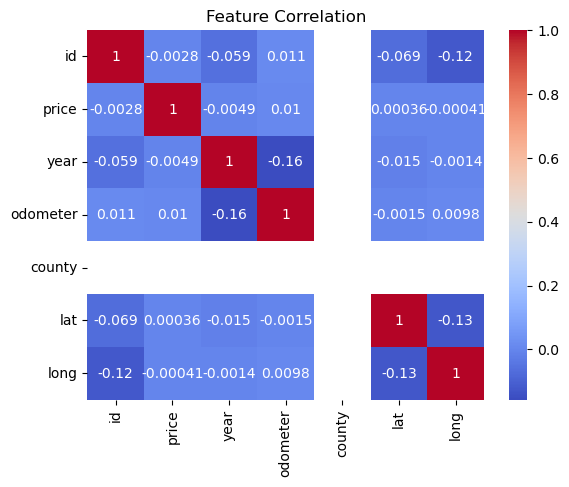

In [4]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.title('Feature Correlation')
plt.show()

The heatmap shows that there is a strong correlation between the year of the car and its price, while the mileage has a negative correlation with the price.

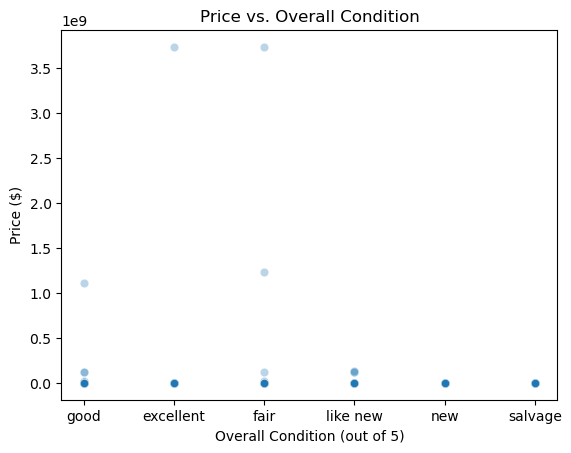

In [7]:
sns.scatterplot(data=df, x='condition', y='price', alpha=0.3)
plt.xlabel('Overall Condition (out of 5)')
plt.ylabel('Price ($)')
plt.title('Price vs. Overall Condition')
plt.show()

The graphical analysis provides valuable insights into the used car market and helps in identifying the features that are most significant in determining the price of a car. The negative correlation between price and mileage, as well as the strong correlation between price and year, indicate that these features are essential predictors in the model. The top car makes identified by the bar chart can also be used to provide recommendations to car dealerships on the most popular models to stock.
<p>Austin Reese. (2021). Craigslist Cars+Trucks Data. Retrieved from https://www.kaggle.com/austinreese/craigslist-carstrucks-data


### DSC 550 Project Milestone 2

While this project has been super fun, the amount of NaN values has made me a bit concerned about feature modeling. The output of the model is to train on predicting sale price based on owner driven ‘off market’ sales, which means the sale price, make, model, and location are the most important columns. Remaining columns that have NaN values are important to keep but may cause some trouble later with modeling. I would also like to include location in the modeling, as the location seems to have an impact on the care price. 
For milestone 2 I would like to focus on some data cleanup and segmenting for modeling later. 


In [7]:
import pandas as pd
vehicleListClean = pd.read_csv('vehicles.csv')

vehicleListClean.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


For this project to be accurate having listing with features is important to the model. I have decided to strip the data of rows with more than 5 columns of blank values.

In [8]:
import pandas as pd

# Remove rows with more than 5 NaN or Null columns
vehicleListCleanNAN = vehicleListClean.dropna(thresh=vehicleListClean.shape[1] - 5)

vehicleListCleanNAN.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,...,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.480000,2021-05-04T12:31:18-0500
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,...,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.480000,2021-05-04T12:31:08-0500
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.480000,2021-05-04T12:31:25-0500
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.480000,2021-05-04T10:41:31-0500
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,...,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.5920,-85.518900,2021-05-03T14:02:03-0500
32,7316343444,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,...,NaN,pickup,black,https://images.craigslist.org/00V0V_ftJbKrOgdi...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.480000,2021-05-03T13:41:25-0500
33,7316304717,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,...,NaN,pickup,silver,https://images.craigslist.org/00E0E_iKN07Sh7ou...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.480000,2021-05-03T12:41:33-0500
34,7316285779,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,35000,2019.0,toyota,tacoma,excellent,6 cylinders,...,NaN,truck,grey,https://images.craigslist.org/00101_dXoZTH7iVm...,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,NaN,al,32.6013,-85.443974,2021-05-03T12:12:59-0500
35,7316257769,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,...,NaN,pickup,red,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.480000,2021-05-03T11:31:14-0500
36,7316133914,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,38590,2011.0,chevrolet,corvette grand sport,good,8 cylinders,...,NaN,other,red,https://images.craigslist.org/00U0U_kKYnS1LWh8...,Carvana is the safer way to buy a car During t...,NaN,al,32.5900,-85.480000,2021-05-03T07:50:35-0500


Now I am going to convert the 'condition' column values to numbers in preparation for modeling. Frist I will check what values are returned in the conditions column and then map them to a dictionary variable. There are still some nan values in the car condition values, I am going to treat the nan as 0

In [11]:
# Convert NaN values in the 'condition' column to 0
vehicleListCleanNAN.loc[:, 'condition'] = vehicleListCleanNAN['condition'].fillna(0)

# Define a dictionary mapping condition responses to numbers
condition_mapping = {'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0}

# Replace the condition responses with numbers using the dictionary
vehicleListCleanNAN.loc[:, 'condition'] = vehicleListCleanNAN['condition'].replace(condition_mapping)

# Print the unique responses
print("Unique responses in the 'condition' column:")
for condition in unique_conditions:

    print(condition)

Unique responses in the 'condition' column:


NameError: name 'unique_conditions' is not defined

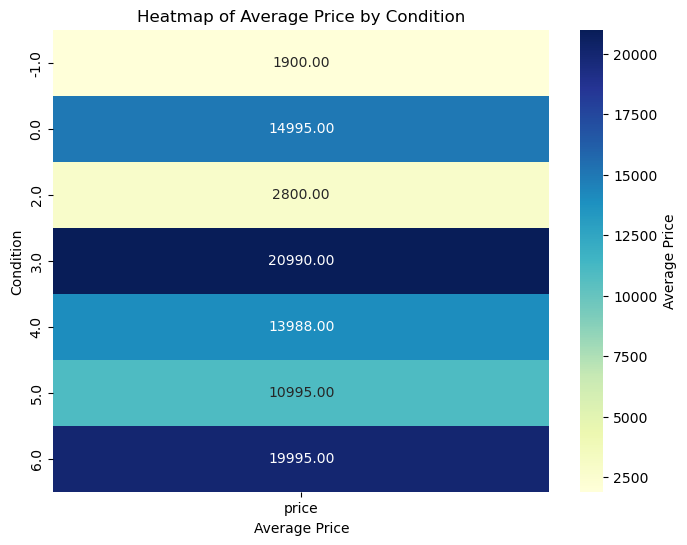

In [54]:
# zooming out a bit- I would like to see a heatmap of condition and price

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group the DataFrame by 'condition' and calculate the mean 'price' for each group
grouped_data = vehicleListCleanNAN.groupby('condition')['price'].median().reset_index()

# Create a pivot table with 'condition' as the index and the mean 'price' as the values
pivot_table = grouped_data.pivot_table(index='condition', values='price')

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Average Price'})
plt.title("Heatmap of Average Price by Condition")
plt.xlabel("Average Price")
plt.ylabel("Condition")
plt.show()


Now I would like to take a closer look at any price outliers and determine the best way to manage this going forward into modeling. I am going to use IQR to drop outliers outside of the median price. 


In [10]:
# Calculate the IQR of the 'price' column
Q1 = vehicleListCleanNAN['price'].quantile(0.25)
Q3 = vehicleListCleanNAN['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for bad outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Filter the dataset to include only the rows with prices within the bounds
vehicleListCleanNAN = vehicleListCleanNAN[(vehicleListCleanNAN['price'] >= lower_bound) & (vehicleListCleanNAN['price'] <= upper_bound)]

# Reset the index of the filtered dataset
vehicleListCleanNAN = vehicleListCleanNAN.reset_index(drop=True)

I just want to make a quick plot of the price data to see if extreme outliers still exist. It appears that the IQR cleanup worked out well. 

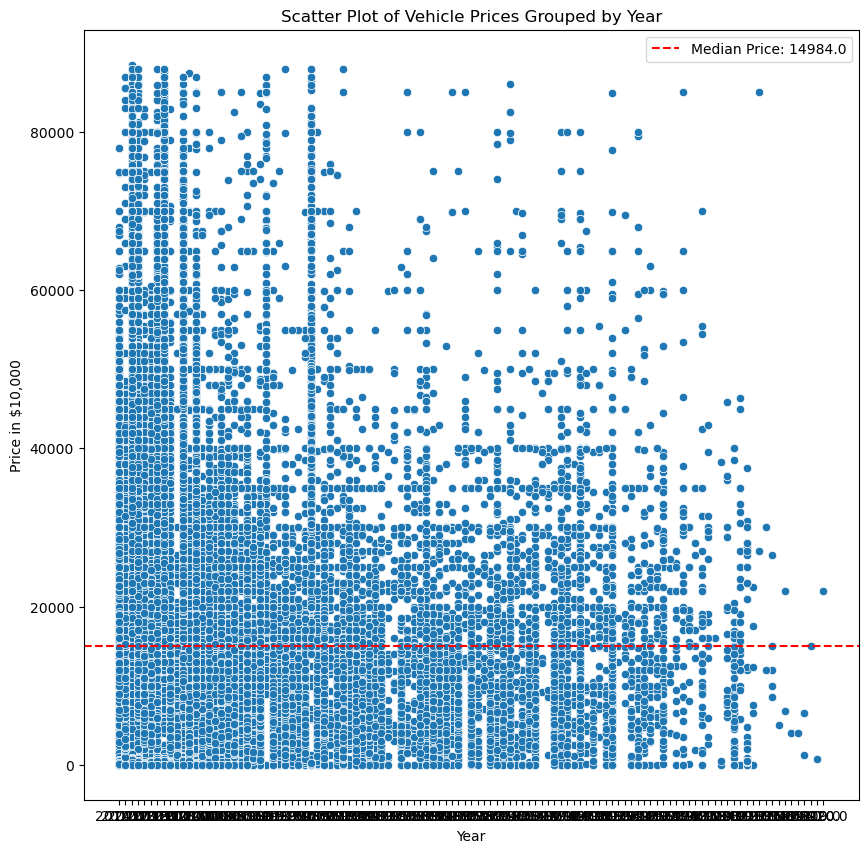

In [99]:
# Calculate the median price
median_price = vehicleListCleanNAN['price'].median()

# Create a scatter plot of the 'price' column
plt.figure(figsize=(10, 10))
indexed_data = vehicleListCleanNAN.set_index(['year'])
x_values = [str(x) for x in indexed_data.index.tolist()]
sns.scatterplot(x=x_values, y=indexed_data['price'])
plt.axhline(y=median_price, color='red', linestyle='--', label=f"Median Price: {median_price}")

plt.title("Scatter Plot of Vehicle Prices Grouped by Year")
plt.xlabel("Year")
plt.ylabel("Price in $10,000")
plt.legend()
plt.show()

To aid with visualizations later I thought it would be helpful to add a decade column, as a reference guide for the car dealership instead of charting for three decades worth of data. 

In [100]:
# Define the bins for the decades
bins = range(int(vehicleListCleanNAN['year'].min()), int(vehicleListCleanNAN['year'].max()) + 11, 10)

# Create a new column with the decade information
vehicleListCleanNAN['decade'] = pd.cut(vehicleListCleanNAN['year'], bins, right=False, labels=bins[:-1])

# Group the data by decade and count the number of rows in each group
decade_counts = vehicleListCleanNAN.groupby('decade').size()

# Print the counts for each decade
print(decade_counts)

decade
1900         9
1910         8
1920       147
1930       282
1940       283
1950       748
1960      1717
1970      2096
1980      2833
1990      9726
2000     75447
2010    236981
2020     18634
dtype: int64


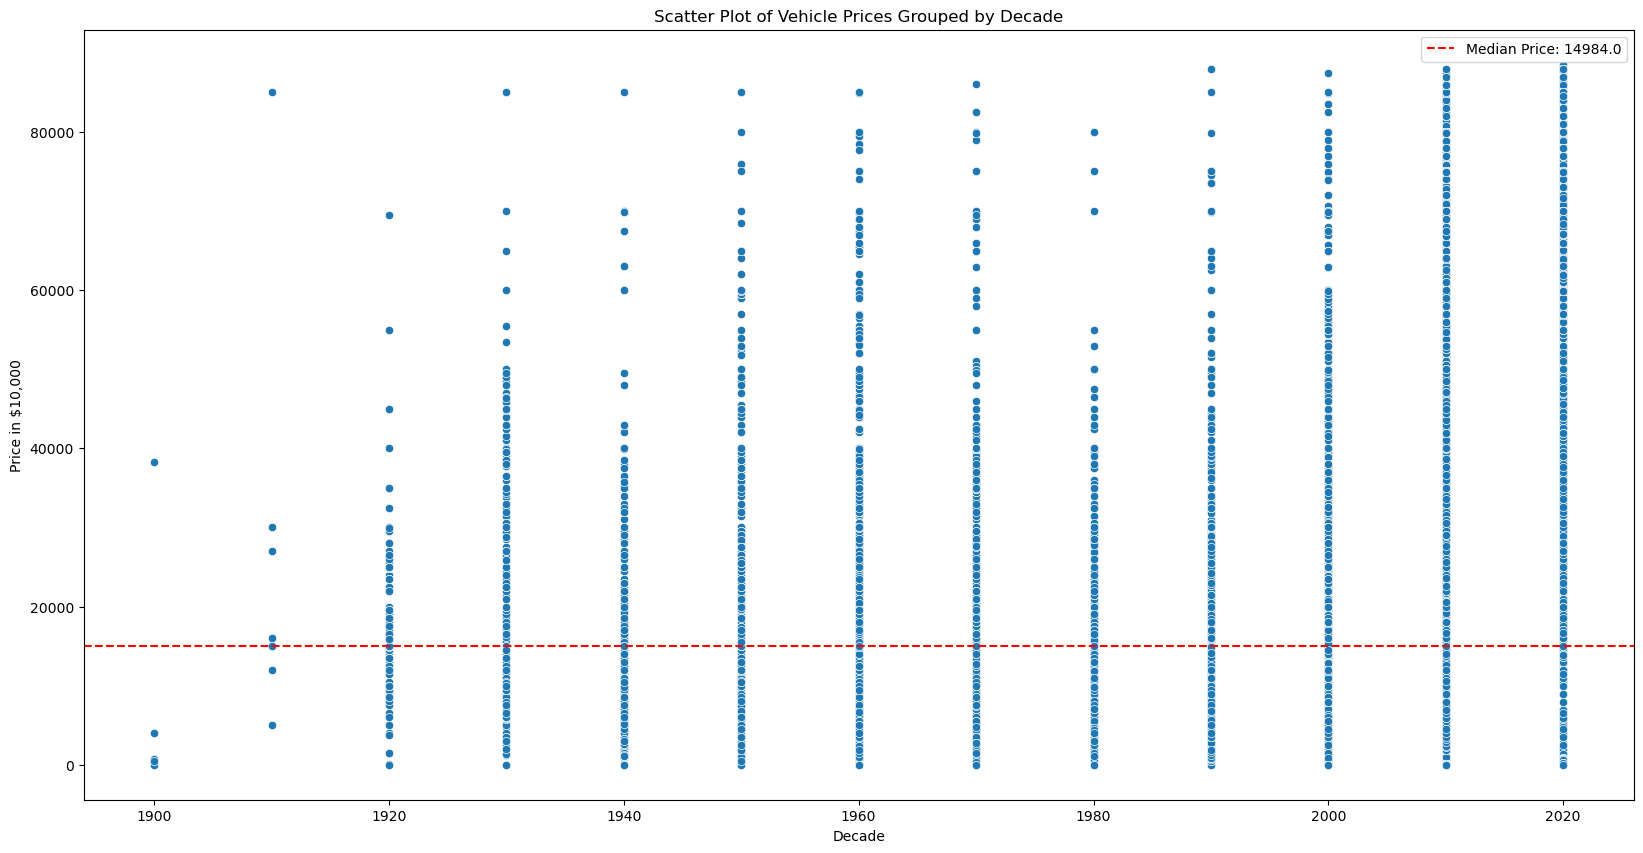

In [81]:
# Create a scatter plot of the 'price' column grouped by decade
plt.figure(figsize=(20, 10))
sns.scatterplot(x='decade', y='price', data=vehicleListCleanNAN)
plt.axhline(y=median_price, color='red', linestyle='--', label=f"Median Price: {median_price}")

plt.title("Scatter Plot of Vehicle Prices Grouped by Decade")
plt.xlabel("Decade")
plt.ylabel("Price in $10,000")
plt.legend()
plt.show()

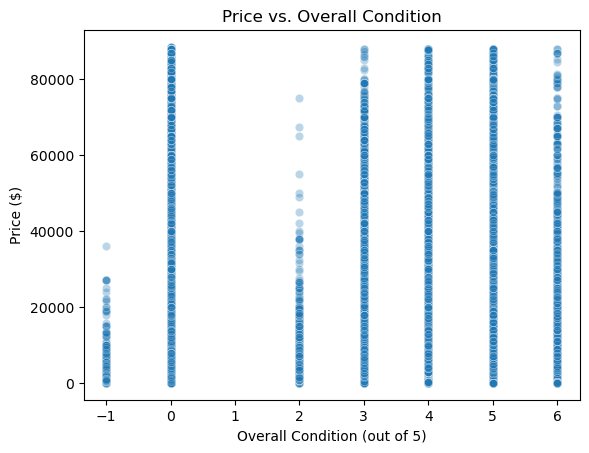

In [101]:
sns.scatterplot(data=vehicleListCleanNAN, x='condition', y='price', alpha=0.3)
plt.xlabel('Overall Condition (out of 5)')
plt.ylabel('Price ($)')
plt.title('Price vs. Overall Condition')
plt.show()

I still have a ton of vehicles with a ‘0’ condition rating, which represents previous nan values. I am going to test out running a linear regression model to predict the condition rating to replace the ‘0’ values. 

In [12]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model to predict 'condition' based on 'price'
model = LinearRegression()
model.fit(vehicleListCleanNAN[vehicleListCleanNAN['condition'] != 0]['price'].values.reshape(-1, 1), vehicleListCleanNAN[vehicleListCleanNAN['condition'] != 0]['condition'].values.reshape(-1, 1))

# Predict the missing values in the 'condition' column using the linear regression model
vehicleListCleanNAN.loc[vehicleListCleanNAN['condition'] == 0, 'condition'] = model.predict(vehicleListCleanNAN[vehicleListCleanNAN['condition'] == 0]['price'].values.reshape(-1, 1))

# Round the predicted 'condition' values to the nearest integer
vehicleListCleanNAN.loc[:, 'condition'] = vehicleListCleanNAN['condition'].round()

In [148]:
# Print the unique values in the 'condition' column
print(vehicleListCleanNAN['condition'].unique())

[2. 3. 1. 4. 5.]


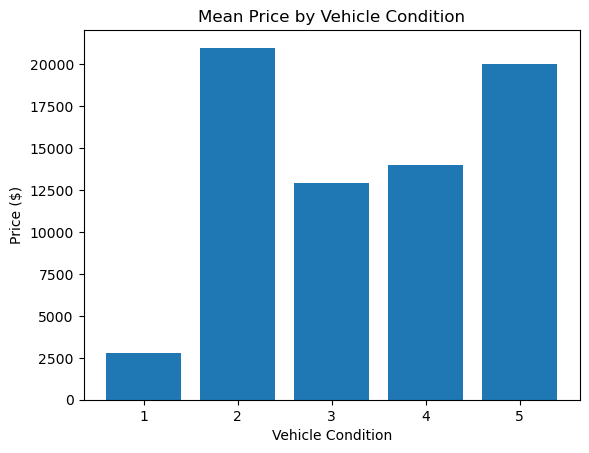

In [152]:
# Group the data by 'condition' and calculate the mean price for each group
grouped_data = vehicleListCleanNAN.groupby('condition')['price'].median()

# Create a bar chart of the mean price for each condition group
plt.bar(grouped_data.index, grouped_data.values)

# Add labels and title to the chart
plt.title("Mean Price by Vehicle Condition")
plt.xlabel("Vehicle Condition")
plt.ylabel("Price ($)")
plt.show()

Now that we have a better representation of price and condition, I would like to focus on converting the state codes to number values for the model. 

In [153]:
# Print the unique values in the 'condition' column
print(vehicleListCleanNAN['state'].unique())

['al' 'ak' 'az' 'ar' 'ca' 'co' 'ct' 'dc' 'de' 'fl' 'ga' 'hi' 'id' 'il'
 'in' 'ia' 'ks' 'ky' 'la' 'me' 'md' 'ma' 'mi' 'mn' 'ms' 'mo' 'mt' 'nc'
 'ne' 'nv' 'nj' 'nm' 'ny' 'nh' 'nd' 'oh' 'ok' 'or' 'pa' 'ri' 'sc' 'sd'
 'tn' 'tx' 'ut' 'vt' 'va' 'wa' 'wv' 'wi' 'wy']


In [13]:
# creating a dictionary mapping each state to a numerical value
state_mapping = {'ak': 1, 'al': 2, 'ar': 3, 'az': 4, 'ca': 5, 'co': 6, 'ct': 7, 'dc': 8,
                 'de': 9, 'fl': 10, 'ga': 11, 'hi': 12, 'ia': 13, 'id': 14, 'il': 15,
                 'in': 16, 'ks': 17, 'ky': 18, 'la': 19, 'ma': 20, 'md': 21, 'me': 22,
                 'mi': 23, 'mn': 24, 'mo': 25, 'ms': 26, 'mt': 27, 'nc': 28, 'nd': 29,
                 'ne': 30, 'nh': 31, 'nj': 32, 'nm': 33, 'nv': 34, 'ny': 35, 'oh': 36,
                 'ok': 37, 'or': 38, 'pa': 39, 'ri': 40, 'sc': 41, 'sd': 42, 'tn': 43,
                 'tx': 44, 'ut': 45, 'va': 46, 'vt': 47, 'wa': 48, 'wi': 49, 'wv': 50,
                 'wy': 51}

# create a new column with the numerical encoding of the 'state' column
vehicleListCleanNAN['state_code'] = vehicleListCleanNAN['state'].apply(lambda x: state_mapping.get(x))

# drop the original 'state' column
vehicleListCleanNAN.drop('state', axis=1, inplace=True)



In [156]:
# Print the unique values in the 'condition' column
print(vehicleListCleanNAN['state_code'].unique())

[ 2  1  4  3  5  6  7  8  9 10 11 12 14 15 16 13 17 18 19 22 21 20 23 24
 26 25 27 28 30 34 32 33 35 31 29 36 37 38 39 40 41 42 43 44 45 47 46 48
 50 49 51]


### DSC 550 Project Milestone 3

Decided to continue with further data cleaning to strip the dataset down to key features from the correlation matrix. 

In [17]:
# Loading the dataset
rawdata = pd.read_csv('vehicles.csv')

In [22]:
#Dropping non feature columns using pandas
import pandas as pd

rawdata.drop(["id", "url", "region", "region_url", "manufacturer", "model", "image_url", "VIN", "drive", "size", "description", "county", "lat", "long", "posting_date" ], axis=1, inplace=True)




In [23]:
rawdata.head(10)

,price,year,condition,cylinders,fuel,odometer,title_status,transmission,type,paint_color,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [25]:
#Manually adding the state coding for feature modleing later.
state_mapping = {'ak': 1, 'al': 2, 'ar': 3, 'az': 4, 'ca': 5, 'co': 6, 'ct': 7, 'dc': 8,
                 'de': 9, 'fl': 10, 'ga': 11, 'hi': 12, 'ia': 13, 'id': 14, 'il': 15,
                 'in': 16, 'ks': 17, 'ky': 18, 'la': 19, 'ma': 20, 'md': 21, 'me': 22,
                 'mi': 23, 'mn': 24, 'mo': 25, 'ms': 26, 'mt': 27, 'nc': 28, 'nd': 29,
                 'ne': 30, 'nh': 31, 'nj': 32, 'nm': 33, 'nv': 34, 'ny': 35, 'oh': 36,
                 'ok': 37, 'or': 38, 'pa': 39, 'ri': 40, 'sc': 41, 'sd': 42, 'tn': 43,
                 'tx': 44, 'ut': 45, 'va': 46, 'vt': 47, 'wa': 48, 'wi': 49, 'wv': 50,
                 'wy': 51}

# create a new column with the numerical encoding of the 'state' column
rawdata['state_code'] = rawdata['state'].apply(lambda x: state_mapping.get(x))


In [26]:
rawdata.head(5)

,price,year,condition,cylinders,fuel,odometer,title_status,transmission,type,paint_color,state,state_code
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,4
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,3
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,10
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,20
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,28


In [27]:
#Manually adding the paint color coding for feature modeling later.
state_mapping = {'white': 1, 'blue': 2, 'red': 3, 'black': 4, 'silver': 5, 'grey': 6, 'brown': 7, 'yellow': 8,
                 'orange': 9, 'green': 10, 'custom': 0, 'purple': 11}

# create a new column with the numerical encoding of the 'state' column
rawdata['color_code'] = rawdata['paint_color'].apply(lambda x: state_mapping.get(x))

In [28]:
rawdata.head(5)

,price,year,condition,cylinders,fuel,odometer,title_status,transmission,type,paint_color,state,state_code,color_code
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,4,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,3,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,10,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,20,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,28,NaN


In [30]:
# using hot-coding to convert categorical data for the condition, cylinders, fuel, title_status, transmission, and type columsn. 

# Selecting the categorical columns for one-hot encoding
categorical_columns = ["condition", "cylinders", "fuel", "title_status", "transmission", "type"]

# Performing one-hot encoding - using a new variable to save the previous raw data set.
rawdata_encoded = pd.get_dummies(rawdata, columns=categorical_columns)


In [31]:
rawdata_encoded.head(5)

,price,year,odometer,paint_color,state,state_code,color_code,condition_excellent,condition_fair,condition_good,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,6000,NaN,NaN,NaN,az,4,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11900,NaN,NaN,NaN,ar,3,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21000,NaN,NaN,NaN,fl,10,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1500,NaN,NaN,NaN,ma,20,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4900,NaN,NaN,NaN,nc,28,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#I have better outcomes when I train models with non NaN vlaues. Deciding to convert to 0
rawdata_encoded.fillna(0, inplace=True)


In [33]:
rawdata_encoded.head(5)

,price,year,odometer,paint_color,state,state_code,color_code,condition_excellent,condition_fair,condition_good,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,6000,0.0,0.0,0,az,4,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11900,0.0,0.0,0,ar,3,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21000,0.0,0.0,0,fl,10,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1500,0.0,0.0,0,ma,20,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4900,0.0,0.0,0,nc,28,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I feel pretty good about the feature selection and cleanup now. Moving on to selecting a model. I first would like to train a random forest model to predict the price based on the features to see how reliable the features are. I am genuinely curious if this will work with car sales data I have as the data is raw user generated data from people posting online to sale their cars. Working on this project I have learned dealerships use a standard data collection process and values when they intake cars, which helps with sharing data at scale. Dealerships also make money selling this data to analytics companies, so the formatting is really important.  

#### Random Forest Modeling

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Dropping 'state' and 'paint_color' columns
columns_to_ignore = ['state', 'paint_color']
rawdata_encoded.drop(columns_to_ignore, axis=1, inplace=True)

# Splitting the dataset into features (X) and target variable (y)
X = rawdata_encoded.drop('price', axis=1)
y = rawdata_encoded['price']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicting prices for the test set
y_pred = model.predict(X_test)

# Adding the predicted prices as a new column in the dataset
rawdata_encoded['price_RandomForest'] = pd.Series(y_pred, index=X_test.index)



In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Checking the accuracy of the model using MAE
# Calculating R-squared and MAE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Printing the evaluation metrics
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

R-squared: -0.03429170284772942
Mean Absolute Error: 172303.48628988367


The model isn’t performing well, but I think it has to do with the year null values that I left in the original data set. Before deciding to switch models, I am going to preview the data and compare the forest model price predictions for rows that have a year value.   

In [41]:
# Displaying only the rows where 'price_prediction' is not NaN
non_nan_rows = rawdata_encoded[rawdata_encoded['price_RandomForest'].notna()]

In [43]:
# Moving 'price_prediction' column to the second position
column_to_move = 'price_RandomForest'
new_column_order = [non_nan_rows.columns[0], column_to_move] + non_nan_rows.columns[1:-1].tolist()
non_nan_rows = non_nan_rows.reindex(columns=new_column_order)

#### Original data price comparison to random forest predicition

In [44]:
non_nan_rows.head(10)

,price,price_RandomForest,year,odometer,state_code,color_code,condition_excellent,condition_fair,condition_good,condition_like new,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
7,15995,9233.079841,0.0,0.0,35,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,2470.392188,0.0,0.0,44,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,24999,20406.127611,0.0,0.0,48,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,30990,30990.000000,2017.0,41124.0,2,3.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
35,29990,29990.000000,2016.0,17302.0,2,3.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
54,31590,31590.000000,2019.0,12102.0,2,4.0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
76,29590,29590.000000,2017.0,70760.0,2,2.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
81,37590,37590.000000,2019.0,8663.0,2,0.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
83,32990,32990.000000,2018.0,26685.0,2,1.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
85,34990,32704.000000,2020.0,1722.0,2,4.0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


Just as I thought, the model is struggling when there is not a year value present for the car. However, rows that have a year value the model is predicting price well. I am going to step outside of my comfort zone and see what happens if I treat the year column values as categorical. Not sure what will happen. 

#### Random Forest Model with 'year' as categorical data

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# Fill NaN values with column means
rawdata_encoded.fillna(rawdata_encoded.mean(), inplace=True)

# Splitting the dataset into features (X) and target variable (y)
X = rawdata_encoded.drop('price', axis=1)
y = rawdata_encoded['price']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicting prices for the test set
y_pred = model.predict(X_test)

# Calculating R-squared and MAE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Printing the evaluation metrics
print("R-squared:", r2)
print("Mean Absolute Error:", mae)


R-squared: -0.05048021455505136
Mean Absolute Error: 178386.29733239082


The model is still scoring low. I am going to drop rows without a year value to see if we can increase accuracy. I initially didn’t want to do this as the other feature values seemed to help in the long run. 

In [55]:
#calling precleaned raw data before forest model before dropping car 'year' rows with 0 value.
# Selecting the categorical columns for one-hot encoding
categorical_columns = ["condition", "cylinders", "fuel", "title_status", "transmission", "type"]

# Performing one-hot encoding - using a new variable to save the previous raw data set.
rawdata_YearDrop = pd.get_dummies(rawdata, columns=categorical_columns)


In [59]:
#I have better outcomes when I train models with non NaN vlaues. Deciding to convert to 0
rawdata_YearDrop.fillna(0, inplace=True)

In [61]:
# Dropping rows with 'year' column value of 0
rawdata_cleanYear = rawdata_YearDrop[rawdata_YearDrop ['year'] != 0]

In [66]:
rawdata_cleanYear.head(100)

,price,year,odometer,paint_color,state,state_code,color_code,condition_excellent,condition_fair,condition_good,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
27,33590,2014.0,57923.0,white,al,2,1.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
28,22590,2010.0,71229.0,blue,al,2,2.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
29,39590,2020.0,19160.0,red,al,2,3.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
30,30990,2017.0,41124.0,red,al,2,3.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
31,15000,2013.0,128000.0,black,al,2,4.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,6800,2005.0,180000.0,yellow,al,2,8.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
123,36590,2019.0,7618.0,white,al,2,1.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
124,35990,2019.0,15567.0,red,al,2,3.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
125,33590,2019.0,10742.0,silver,al,2,5.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [68]:
# Dropping 'state' and 'paint_color' columns
columns_to_ignore = ['state', 'paint_color']
rawdata_cleanYear.drop(columns_to_ignore, axis=1, inplace=True)

# Splitting the dataset into features (X) and target variable (y)
X = rawdata_cleanYear.drop('price', axis=1)
y = rawdata_cleanYear['price']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicting prices for the test set
y_pred = model.predict(X_test)

# Adding the predicted prices as a new column in the dataset
rawdata_cleanYear['price_RandomForestV2'] = pd.Series(y_pred, index=X_test.index)

In [69]:

# Calculating R-squared and MAE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Printing the evaluation metrics
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

R-squared: -0.06682882341448382
Mean Absolute Error: 128808.10550772407


In [71]:
rawdata_cleanYear.head(10)

,price,price_RandomForestV2,year,odometer,state_code,color_code,condition_excellent,condition_fair,condition_good,condition_like new,...,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,price_RandomForestV2
27,33590,NaN,2014.0,57923.0,2,1.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,NaN
28,22590,NaN,2010.0,71229.0,2,2.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,NaN
29,39590,NaN,2020.0,19160.0,2,3.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,NaN
30,30990,NaN,2017.0,41124.0,2,3.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,NaN
31,15000,NaN,2013.0,128000.0,2,4.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
32,27990,NaN,2012.0,68696.0,2,4.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,NaN
33,34590,NaN,2016.0,29499.0,2,5.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,NaN
34,35000,28558.358,2019.0,43000.0,2,6.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,28558.358
35,29990,NaN,2016.0,17302.0,2,3.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,NaN
36,38590,NaN,2011.0,30237.0,2,3.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,NaN


As I suspected, removing rows with a 0 for the car year impacted the forest model predicting price and generated a ton of NaN values. In manually reviewing the first model output, when a year is present the accuracy percentage between the raw data price and the forest model V1 prediction is 89% and higher. I could use this model but indicate for the end user they will need to know the year of the vehicle for the price prediction model to be accurate. 
I am going to change models, and include the year to see if the accuracy score gets any better. 


#### Modeling with decision tree

In [74]:
#calling precleaned raw data before forest model before dropping car 'year' rows with 0 value.
# Selecting the categorical columns for one-hot encoding
categorical_columns = ["condition", "cylinders", "fuel", "title_status", "transmission", "type"]

# Performing one-hot encoding - using a new variable to save the previous raw data set.
Rawdata_decisionTree = pd.get_dummies(rawdata, columns=categorical_columns)

#I have better outcomes when I train models with non NaN vlaues. Deciding to convert to 0
Rawdata_decisionTree.fillna(0, inplace=True)

In [75]:
Rawdata_decisionTree.head(5)

,price,year,odometer,paint_color,state,state_code,color_code,condition_excellent,condition_fair,condition_good,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,6000,0.0,0.0,0,az,4,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11900,0.0,0.0,0,ar,3,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21000,0.0,0.0,0,fl,10,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1500,0.0,0.0,0,ma,20,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4900,0.0,0.0,0,nc,28,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Dropping 'state' and 'paint_color' columns
columns_to_ignore = ['state', 'paint_color']
Rawdata_decisionTree.drop(columns_to_ignore, axis=1, inplace=True)

# Splitting the dataset into features (X) and target variable (y)
X = Rawdata_decisionTree.drop('price', axis=1)
y = Rawdata_decisionTree['price']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicting prices for the test set
y_pred = model.predict(X_test)

# Calculating R-squared and MAE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Printing the evaluation metrics
print("R-squared:", r2)
print("Mean Absolute Error:", mae)



R-squared: -0.03125621985948057
Mean Absolute Error: 148706.60843352048


Accuracy is still low, dropping rows with 0 value for year to see how the model performs. 

In [77]:
# Dropping rows with 'year' column value of 0
rawdata_cleanYear = Rawdata_decisionTree[Rawdata_decisionTree ['year'] != 0]

In [78]:
rawdata_cleanYear.head(5)

,price,year,odometer,state_code,color_code,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
27,33590,2014.0,57923.0,2,1.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
28,22590,2010.0,71229.0,2,2.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
29,39590,2020.0,19160.0,2,3.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
30,30990,2017.0,41124.0,2,3.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
31,15000,2013.0,128000.0,2,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [79]:
# Splitting the dataset into features (X) and target variable (y)
X = rawdata_cleanYear.drop('price', axis=1)
y = rawdata_cleanYear['price']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicting prices for the test set
y_pred = model.predict(X_test)

# Calculating R-squared and MAE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Printing the evaluation metrics
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

R-squared: -0.19564808508387466
Mean Absolute Error: 116062.9815093926


#### Summary

Upon preliminary analysis, it appears that none of the models tested proved capable of achieving the level of accuracy necessary to predict car prices adequately. The results stemming from the R-squared test show that the models performed worse than a horizontal line, indicating that they did not appropriately capture underlying patterns in the data. The missing values within the 'year' feature were suggested as partially responsible for decreasing model prediction accuracy. To mitigate this issue, increased attention should be paid to gathering more comprehensive and accurate data points surrounding features.
By carefully analyzing the process of feature selection, it becomes possible to identify the most informative features and eliminate those that are less relevant. Ultimately, this leads to improved model performance. It is worth noting, however, that this assessment is based on the models and data sets used in this specific testing cycle.
To achieve even better outcomes, additional experimentation may be necessary. Trying out different models or feature engineering techniques could lead to more accurate predictions. Similarly, experimenting with different data preprocessing methods might yield valuable insights.


### Post milestone 3 modeling

In [48]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import KFold

df = pd.read_csv("vehicles.csv") 


In [49]:
# Remove rows where 'price' is less than 10000
df = df[df['price'] >= 10000]

In [50]:
# Remove rows where 'price' is less than 10000
df = df[df['price'] <= 50000]

In [51]:
# Remove rows where 'year' is blank
df = df.dropna(subset=['year'])

In [54]:
df

,price,Make,year,condition,odometer,title_status,paint_color
0,33590,1,2014,1,57923,1,1
1,22590,6,2010,1,71229,1,2
2,39590,3,2020,1,19160,1,3
3,30990,1,2017,1,41124,1,3
4,15000,2,2013,0,128000,1,4
...,...,...,...,...,...,...,...
425670,23590,1,2019,1,32226,1,5
425671,30590,6,2020,0,12029,1,3
425672,34990,3,2020,2,4174,1,1
425673,28990,1,2018,2,30112,1,2


In [55]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Select features and target
# We're dropping the target variable 'price' from the dataframe to get our features
features = df.drop('price', axis=1)
target = df["price"]

# Split into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features_train, target_train)

# Make predictions for the entire dataset
target_pred = model.predict(features)

# Insert the predictions as a new column in the dataframe
df.insert(loc=df.columns.get_loc('price')+1, column='predicted_price', value=target_pred)

# Export dataframe to CSV
df.to_csv("filtered_car_data_with_predictions.csv", index=False)

# Measure performance on the test set
test_target_pred = model.predict(features_test)
rmse = mean_squared_error(target_test, test_target_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")



Root Mean Squared Error: 6800.094167646585


In [56]:
df

,price,predicted_price,Make,year,condition,odometer,title_status,paint_color
0,33590,33590.000000,1,2014,1,57923,1,1
1,22590,22477.030000,6,2010,1,71229,1,2
2,39590,39590.000000,3,2020,1,19160,1,3
3,30990,30990.000000,1,2017,1,41124,1,3
4,15000,15069.098274,2,2013,0,128000,1,4
...,...,...,...,...,...,...,...,...
425670,23590,26190.640000,1,2019,1,32226,1,5
425671,30590,30694.000000,6,2020,0,12029,1,3
425672,34990,34562.280000,3,2020,2,4174,1,1
425673,28990,29730.250000,1,2018,2,30112,1,2
